# Homework 2 - Data Wrangling


*In this homework, you are going to work on a real-world dataset and perform some data transformations. We suggest you start the homework early.*

**Submission Instructions**

---
It is important that you follow the submission instructions. 
1. Copy this assignment notebook to your Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_hw2`</font>.

2. Write your solutions in the cells  marked as <font color = 'green'>`# your code`</font>.

3. **Do not delete your outputs**. They are essential for the grading. Make sure that cells containing your solutions are executed, and the results are displayed on the notebook.

4. When you're done please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


  a. Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.

  b. Then submit the downloaded <font color="red">`.ipynb`</font> version of your work on SUCourse.


For any question, please use the discussion page on Sucourse.

---

**Important Note: In this homework, you are not allowed to use Pandas.**

In [1]:
from google.colab import drive
drive.mount('./drive', force_remount=True)

path_prefix = './drive/My Drive'

Mounted at ./drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import re

%matplotlib inline

## Social Distancing in Venezuela

Governments across the globe imposed various NPIs (nonpharmaceutical interventions) to limit the mobility of masses and foster social distancing to prevent more infections. In Venezuela, a survey is conducted to collect public opionion on the impacts of COVID-19, which also captures the tendency to adhere to social distancing rules in public. You may read more about the data in detail from the link below.

https://data.humdata.org/dataset/open_one_time_covid_impact

In this homework, you are going to be working on a small sample from the original data, `venezuela_covid_impact_soc_dist.csv`, that focuses on social distancing, in which the following fields are stored:

```
'submission_id', 'submission_date', 'gender', 'age', 'education', 'how_likely_to_social_distance_when_out_in_public'
```

The first five rows of the file can be viewed below:

```
submission_id,submission_date,gender,age,education,how_likely_to_social_distance_when_out_in_public
4621122344845312,2020   12 26  ,Male,26 to 35 years old,University or college degree completed,Very likely
5073314990260224,<li>2020 12 10</li>,Male,16 to 25 years old,Some secondary school / high school,Neither likely nor unlikely
5703966068572160,  2020----11++++ 19,Female,36 to 45 years old,Some university or college,Very likely
5782300156755968,2020   12 07  ,Male,16 to 25 years old,Secondary/high school,Unlikely

```

** **Do not forget to add the shared file 'venezuela_covid_impact_soc_dist.csv' to your own drive.** **

### Q1 - Read the Dataset

In the provided dataset, entries are separated by commas. Read and store the file as a 2d numpy array in which columns capture the corresponding fields.

- Read the given file into a numpy array.
- At the end, print the number of rows and columns.

```
Number of rows: [...], columns: [...]
```

*Hint: Do not forget to skip the first line (the header).*

In [13]:
inf = []
fname = 'venezuela_covid_impact_soc_dist.csv'

with open(join(path_prefix, fname), "r") as f:
    lines = f.readlines()[1:]
    for line in lines:
        sets = line.strip().split(',')
        inf.append(sets)

inf = np.array(inf)

print('Number of rows: ', inf.shape[0], ', columns: ', inf.shape[1], '.', sep = '')

Number of rows: 7341, columns: 6.


### Q2 - Cleaning Date Values

During the data collection process, most of the date values were registered with *non-numeric* rubbish characters between the date elements due to a glitch in the system. Some of the examples can be seen below where %Y represents years (e.g. 2021, 2020), %m month as a zero-padded decimal number (e.g. 07, 08) and %d day of the month as a zero-padded decimal number (e.g. 01, 03).

```
'%Y   %m %d', 
'  %Y----%m++++ %d', 
'<li>%Y %m %d</li>', 
'%Y /||\ %m %d  ', 
'<<%Y  %m >> %d'
```

- You may assume that the order of date elements is always the same in the raw data: %Y %m %d.
- Extract the actual date entries from the data. We expect you to use regular expressions for this part.
- Rearrange the date values as **'%d-%m-%Y'** in the data (separate them with hypen -).
- At the end, print the first three instances of the resulting dates as a list.

```
['26-12-2020' '10-12-2020' '19-11-2020']
```

In [14]:
finder = re.compile('\d+')

for j in range(inf.shape[0]):
    desire = finder.findall(inf[j, 1])
    inf[j, 1] = desire[2] + '-' + desire[1] + '-'+ desire[0]

print(inf[0:3,1])


['26-12-2020' '10-12-2020' '19-11-2020']


### Q3 - Drop Duplicate Rows

As mentioned above, some problems took place during the data collection process and we are suspecting a case of data duplication. In fact, it turns out that there are rows with duplicates in the data. An excerpt from the file can be seen below:

```
5907953602527232,01-08-2021,Not Available,Not Available,Not Available,Not available,Not Available,Agree,Very likely
5907953602527232,01-08-2021,Not Available,Not Available,Not Available,Not available,Not Available,Agree,Very likely
5520514392260608,11-16-2020,Female,36 to 45 years old,"I can afford food, but nothing else",Secondary school/ high school completed,I am unemployed,Agree,Very likely
```

- Remove the duplicate rows from the array so that only unique entries are left.
- At the end, print the total number of rows in the data after the duplicate removal.

```
Number of rows after duplicate removal: [...]
```

In [15]:
inf = np.unique(inf, axis = 0)
print('Number of rows after duplicate removal: ', inf.shape[0], '.', sep = '')

Number of rows after duplicate removal: 7042.


### Q4 - Number of Entries per Month

The users took the survey between November 2020 and January 2021. Display the total number of submissions per each month.

- Calculate the number of entries registered in each month.
- Display the result as a bar chart in which the bars are sorted wrt count values.
 
![](https://i.ibb.co/5Fsv0Kb/m.png)

 *Hint: The dates are stored in a pre-defined format (day-month-year) after Q2.*

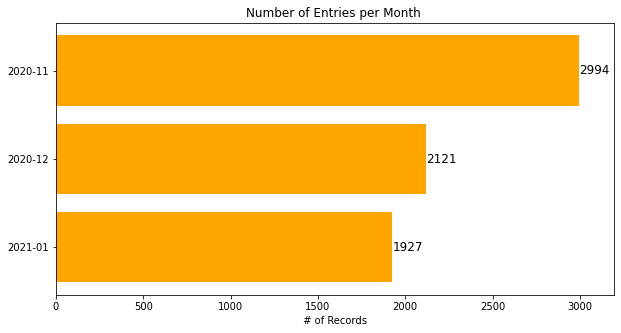

In [16]:
data = [[0,'2020-11'], [0,'2020-12'], [0,'2021-01']]

for i in inf:
    if '01-2021' in i[1]:
        data[2][0] += 1
    elif '12-2020' in i[1]:
        data[1][0] += 1 
    elif '11-2020' in i[1]:
        data[0][0] += 1


data.sort(key = lambda x: x[0])
dataDATE = [i[1] for i in data]
dataNUMB = [i[0] for i in data]

plt.figure(figsize = (10, 5))
plt.xlabel(" # of Records ")
plt.title('Number of Entries per Month ')
plt.barh(dataDATE, dataNUMB, color = "Orange") # Plot bar chart
plt.xlim([0, max(dataNUMB) + 200])

for final, drawDate in zip(dataNUMB, dataDATE):
    plt.text(final, drawDate, str(final), verticalalignment = "center", fontsize = 12)

plt.show()


### Q5 - Transforming the Employment Status Column

In the survey, the users were asked to provide their education level. Since it was an optional question, some left it empty or prefered not to answer. For the first case, such responses were recored as `Not available`, while the latter as `Prefer not to answer`.

In addition, some test takers provided the same answer with slightly different words. For instance, to indicate high school some wrote 'Secondary school/ high school completed', while others simply put 'High school'. To eliminate the inconsistency, we need to replace such entries with a coherent choice. In the dictionary below, keys correspond to the entries that need to be replaced by their associated value.

- Replace the given education categories with the provided list.
- Remove the rows with `Not available` or `Prefer not to answer` responses.
- Finally, print the resulting number of rows and unique education categories .

```
Number of rows: [...]
['High school' 'Post graduate' 'Primary school' 'Technical school' 'University']
```

In [18]:
adj_edu = {
    'Secondary school/ high school completed': 'High school',
    'Secondary/high school': 'High school',
    'Some secondary school / high school': 'High school',
    'University or college degree completed': 'University',
    'Some university or college': 'University',
    'College or university': 'University',
    'Technical school diploma or degree completed': 'Technical school',
    'Some technical education (e.g polytechnic school)': 'Technical school',
    'Post-graduate education': 'Post graduate',
    'Some primary education': 'Primary school',
    'Primary school completed': 'Primary school'
}

condition1 = inf[:,4] != 'Prefer not to answer'
condition2 = inf[:,4] != 'Not available'
rule = condition1 & condition2
inf = inf[rule]

for i in inf:
    if i[4] in adj_edu.keys():
        i[4] = adj_edu[i[4]]

lastEdu = np.unique(inf[:, 4])
rowsUP = inf.shape[0]

print('Number of rows: ', rowsUP , ".", sep = '')
print(lastEdu)

Number of rows: 6962.
['High school' 'Post graduate' 'Primary school' 'Technical school'
 'University']


### Q6 - Social Distancing & Education

Lastly, we want to understand the relationship between education and adherence to social distancing. In the `how_likely_to_social_distance_when_out_in_public` column, there are five different replies, ranged between `'Very unlikely'` to `'Very likely'`. Here, we want to calculate the likelihood of getting `'Very likely'` replies conditioned on education status. In particular, you'll find the education category that maximizes this probability.



$\DeclareMathOperator*{\argmax}{argmax} \argmax\limits_{\small{edu} \, \in \, \text{Education Category}}\;P(\text{Social Distancing}=\text{'Very likely'}|\text{Education Category}=\text{edu})$

- For each education category, calculate the conditional probability above.
- Get the one that returns the highest. 
- At the end, print the education category and its probability value.

```
Post graduate: [...]
```

In [19]:
maximizesProbability = 0

for i in lastEdu:
    Lcounter = 0
    eduIndex = np.where(inf == i)[0]
    eduNumb = (eduIndex.size)
    
    for i in eduIndex:
        if inf[i, 5] == 'Very likely':
            Lcounter = (Lcounter) + 1
    currentProb = Lcounter / eduNumb
    
    #swap
    if currentProb > maximizesProbability:
        maximizesProbability = i
        maximizesProbability = currentProb

print('Post graduate: ', float(maximizesProbability), ".", sep= '')

Post graduate: 0.5345268542199488.
